In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

In [28]:
class MatrixLinearRegression:
    
    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        XT_X_inv = np.linalg.inv(X.T @ X)
        weights = np.linalg.multi_dot([XT_X_inv, X.T, y])
        self.bias, self.weights = weights[0], weights[1:]
        
    def predict(self, X_test):
        return X_test @ self.weights + self.bias

In [29]:
income = pd.read_csv('multiple_linear_regression_dataset.csv')

In [30]:
X1, y1 = income.iloc[:, :-1].values, income.iloc[:, -1].values
X1_scaled = scale(X1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=10)
X1_train_s, X1_test_s, y1_train, y1_test = train_test_split(X1_scaled, y1, random_state=0)

In [31]:
X1_train.shape, X1_test.shape

((15, 2), (5, 2))

In [32]:
correlation_matrix = income.corr()
correlation_matrix.style.background_gradient(cmap='coolwarm')

,age,experience,income
age,1.000000,0.615165,0.532204
experience,0.615165,1.000000,0.984227
income,0.532204,0.984227,1.000000


In [82]:
matrix_linear_regression = MatrixLinearRegression()
matrix_linear_regression.fit(X1_train_s, y1_train)

In [83]:
matrix_lr_pred_res = matrix_linear_regression.predict(X1_test_s)
matrix_lr_r2 = r2_score(y1_test, matrix_lr_pred_res)
matrix_lr_mape = mean_absolute_percentage_error(y1_test, matrix_lr_pred_res)

In [35]:
print(f'Matrix Linear regression  R2 score: {matrix_lr_r2}')
print(f'Matrix Linear regression MAPE: {matrix_lr_mape}', '\n')

Matrix Linear regression  R2 score: 0.9307237996010834
Matrix Linear regression MAPE: 0.0466657717652587 



In [36]:
print(f'weights: {matrix_linear_regression.bias, *matrix_linear_regression.weights}')

weights: (40922.38666080836, -1049.7866043343383, 8718.764356366164)


In [21]:
print(f'prediction: {matrix_lr_pred_res}')

prediction: [46528.00800666 35018.47848628 49448.73803373 38604.36954966
 30788.13913983]


In [22]:
income.head(1)

,age,experience,income
0,25,1,30450


In [ ]:
incom_calc = -1049*age + 8718*expirience + 40922

In [40]:
w1_old = 0.001
w1_new = 0.0009

In [41]:
w1 = w1_old - w1_new

In [42]:
w1

0.00010000000000000005

In [43]:
w1_old - w1

0.0009

In [45]:
X1_train_s.shape

(15, 2)

In [93]:
class AproxLinearRegression:
    
    def __init__(self, learning_rate=0.01, tolerence=1e-4, n_end=1000):
        self.learning_rate = learning_rate
        self.tolerence = tolerence
    
        self.n = 0
        self.n_end = n_end

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.bias, self.weights = 0, np.zeros(n_features)
        previous_db, previous_dw = 0, np.zeros(n_features)
        
        while True:
            y_pred = X @ self.weights + self.bias
            db = 1 / n_samples * np.sum(y_pred - y)
            dw = 1 / n_samples * X.T @ (y_pred - y)
            self.bias = self.bias - self.learning_rate * db
            self.weights = self.weights - self.learning_rate * dw
            
            abs_db_reduction = np.abs(db - previous_db)
            abs_dw_reduction = np.abs(dw - previous_dw)

            self.n += 1
            
            if abs_db_reduction < self.tolerence:
                if abs_dw_reduction.all() < self.tolerence:
                    break
            
            if self.n > self.n_end:
                break
                    
            previous_db = db
            previous_dw = dw
                
    def predict(self, X_test):
        return X_test @ self.weights + self.bias

In [85]:
ap_lin_reg = AproxLinearRegression()

In [86]:
ap_lin_reg.fit(X1_train_s, y1_train)

In [87]:
ap_lin_reg.n

6595

In [88]:
pred_res = ap_lin_reg.predict(X1_test_s)
r2 = r2_score(y1_test, pred_res)
mape = mean_absolute_percentage_error(y1_test, pred_res)

In [89]:
print(f'Linear regression R2 score: {r2}')
print(f'Linear regression MAPE: {mape}', '\n')

Linear regression R2 score: 0.9307237996011029
Linear regression MAPE: 0.04666577176525262 



In [77]:
print(f'weights: {ap_lin_reg.bias, *ap_lin_reg.weights}')

weights: (40922.38666080791, -1049.7866043333488, 8718.764356365164)


In [84]:
print(f'Matrix Linear regression  R2 score: {matrix_lr_r2}')
print(f'Matrix Linear regression MAPE: {matrix_lr_mape}', '\n')

Matrix Linear regression  R2 score: 0.9307237996010834
Matrix Linear regression MAPE: 0.0466657717652587 



In [79]:
print(f'weights: {matrix_linear_regression.bias, *matrix_linear_regression.weights}')

weights: (40922.38666080836, -1049.7866043343383, 8718.764356366164)


In [81]:
0.9307237996010834 - 0.9307237996011029

-1.942890293094024e-14

In [90]:
0.04666577176525262 - 0.0466657717652587 

-6.078471059822732e-15

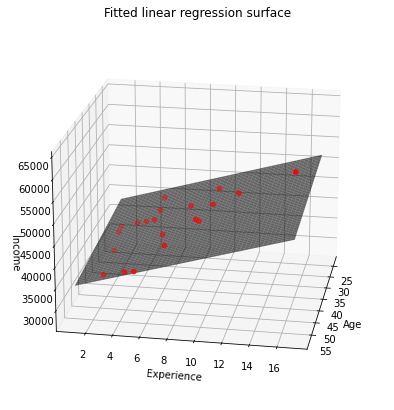

In [91]:
feature1, feature2 = X1[:, 0], X1[:, 1]
X1_linspace = np.linspace(feature1.min(), feature1.max())
X2_linspace = np.linspace(feature2.min(), feature2.max())
X1_surface, X2_surface = np.meshgrid(X1_linspace, X2_linspace)
X_surfaces = np.array([X1_surface.ravel(), X2_surface.ravel()]).T

sk_linear_regression = LinearRegression()
sk_linear_regression.fit(X1_train, y1_train)
y_surface = sk_linear_regression.predict(X_surfaces).reshape(X1_surface.shape)

fig = plt.figure(figsize=(9, 7))
ax = plt.axes(projection='3d')
ax.scatter(feature1, feature2, y1, color='red', marker='o')
ax.plot_surface(X1_surface, X2_surface, y_surface, color='black', alpha=0.6)
plt.title('Fitted linear regression surface')
ax.set_xlabel('Age')
ax.set_ylabel('Experience')
ax.set_zlabel('Income')
ax.view_init(20, 10)
plt.show()